In [2]:
import numpy as np
def cubicspline(x, y):
    n = x.shape[0]-1
    l = np.zeros(len(x))
    h = np.zeros(len(x)-1)
    mu = np.zeros(len(x)-1)
    z = np.zeros(len(x))
    c = np.zeros(len(x))
    b = np.zeros(len(x)-1)
    d= np.zeros(len(x)-1)
    alphai = np.zeros(len(x)-1)
    for i in range(0,len(x)-1):
        h[i] = x[i+1]-x[i]
        
        
    for i in range(1,len(x)-1):
        alphai[i] = (3/h[i])*(y[i+1]-y[i]) - (3/h[i-1]*(y[i]-y[i-1]))
    l[0]=1
    mu[0] = 0
    z[0]= 0
        
    for i in range(1,len(x)-1):
        l[i] = 2*(x[i+1]-x[i-1]) - h[i-1]*mu[i-1]
        mu[i] = h[i]/l[i]
        z[i] = (alphai[i] - h[i-1]*z[i-1])/l[i]
    l[n]=1
    z[n]=0
    c[n]=0
    print(l)
    for j in range(len(x)-2,-1,-1):
        c[j]=z[j]-mu[j]*c[j+1]
        b[j]=(y[j+1]-y[j])/h[j]-(h[j]*(c[j+1] +2*c[j]))/3
        d[j]=(c[j+1]-c[j])/(3*h[i])
    print(c)    
    return a,b,c,d
            
            

[1.         0.44       0.4125     0.41066667 0.41053571 0.41052632
 0.41052564 0.41052559 0.41052559 1.        ]
[  0.         -49.08997954  77.69302801 -32.81388336  26.79147132
 -81.42287306  79.27342947   0.39931166  24.65651177   0.        ]


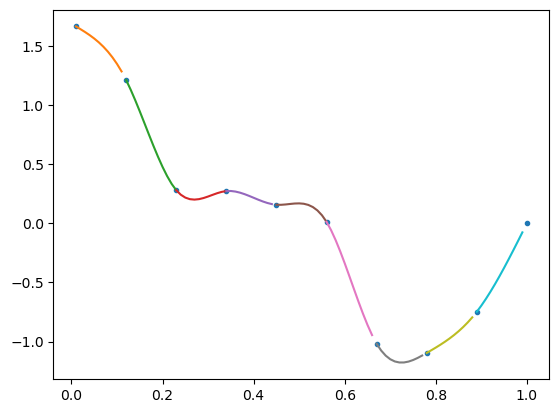

In [3]:
import matplotlib.pyplot as plt
f = lambda x: weierstrass(x, 0.5, 4, 100)

def weierstrass(x, a, b, N):
    """
    Calculates the Weierstrass function for a given x.

    Parameters:
        x: The input value.
        a: A constant between 0 and 1.
        b: An odd integer greater than 1.
        N: The number of terms in the summation.

    Returns:
        The value of the Weierstrass function at x.
    """

    result = 0
    for n in range(N):
        result += a**n * np.cos(b**n * np.pi * x)
    return result

points = 10
x = np.linspace(0.01,1,points)
#x = np.array([1,2,3,4])
# figure out f for each x
a = np.zeros(x.shape[0])
for i in range(x.shape[0]):
    a[i] = f(x[i])

#a = np.array([ f(4), f(3), f(2), f(1)])
             
a,b,c,d = cubicspline(x,a)

plt.plot(x, a, '.')
for j in range(x.shape[0]-1):
    xj = np.arange(x[j],x[j+1], .01)
    sxj = a[j]+ b[j]*(xj - x[j]) + c[j]*(xj - x[j])**2 +d[j]*(xj - x[j])**3
    plt.plot(xj,sxj)
plt.show()


